In [1]:
# MOVIELENS PROJECT
import pandas as pd

pd.set_option("max_columns",None)
pd.set_option("max_rows",None)

import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [2]:
#importing

movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['movieid' , 'title' , 'genres'],encoding='latin-1')
ratings = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['userid' , 'movieid' , 'rating' , 'timestamp'] )
users = pd.read_csv('users.dat' , delimiter = '::' , names = ['userid' , 'gender' , 'age' ,'occupation' ,'zip_code'])


In [3]:
movies.head(5)

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
users.head(5)

,userid,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings.head(5)

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
# merging

df1=pd.merge(users.drop("zip_code",axis=1),ratings.drop("timestamp",axis=1),on="userid")

master_data=pd.merge(df1,movies,on="movieid")

In [7]:
master_data.head()

,userid,gender,age,occupation,movieid,rating,title,genres
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
master_data.shape

(1000209, 8)

In [9]:
master_data.age.value_counts(normalize=True).to_frame().reset_index()

,index,age
0,25,0.395473
1,35,0.198961
2,18,0.183498
3,45,0.083616
4,50,0.072475
5,56,0.038772
6,1,0.027205


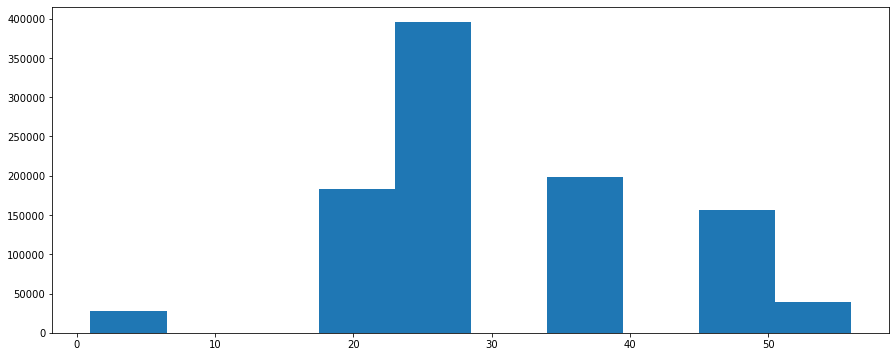

In [10]:
# 1.user age distribution histogram-data visualization
fig=plt.figure(figsize=(15,6))
plt.hist(master_data["age"]);

In [11]:
movie_rating=master_data[["title","rating"]].groupby("title").mean().sort_values("rating",ascending=False)
movie_rating


,rating
title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [12]:
# 2.Toy story rating
movie_rating.loc[["Toy Story (1995)"]]

,rating
title,
Toy Story (1995),4.146846


In [13]:
#3.Top 25 movies
movie_rating.head(25)

,rating
title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [14]:
# 4.userid 2696
master_data[master_data["userid"]==2696]

,userid,gender,age,occupation,movieid,rating,title,genres
24345,2696,M,25,7,1270,2,Back to the Future (1985),Comedy|Sci-Fi
29848,2696,M,25,7,1097,3,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696,M,25,7,1617,4,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696,M,25,7,800,5,Lone Star (1996),Drama|Mystery
273633,2696,M,25,7,3386,1,JFK (1991),Drama|Mystery
277808,2696,M,25,7,3176,4,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696,M,25,7,1711,4,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696,M,25,7,1589,3,Cop Land (1997),Crime|Drama|Mystery
598042,2696,M,25,7,1783,4,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696,M,25,7,1892,4,"Perfect Murder, A (1998)",Mystery|Thriller


In [15]:
movies["col_genres"]=movies["genres"].apply(lambda x:str(x).split('|'))
movies.head()

,movieid,title,genres,col_genres
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [16]:
# feature engg.
#1-unique genres
genres=[]
for i in movies['col_genres']:
    genres.extend(i)
    
genres=set(genres)
genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [17]:
master_data.head(1)

,userid,gender,age,occupation,movieid,rating,title,genres
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [18]:
# 2 - Movie genre columns one hot encoding
for i in genres:
    master_data[i]=master_data['genres'].apply(lambda x: 1 if i in x else 0)
    
master_data.head(1)

,userid,gender,age,occupation,movieid,rating,title,genres,Documentary,Film-Noir,Children's,Action,Musical,Crime,Adventure,Thriller,Sci-Fi,Animation,Drama,War,Fantasy,Horror,Comedy,Western,Mystery,Romance
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [19]:
master_data.corr()

,userid,age,occupation,movieid,rating,Documentary,Film-Noir,Children's,Action,Musical,Crime,Adventure,Thriller,Sci-Fi,Animation,Drama,War,Fantasy,Horror,Comedy,Western,Mystery,Romance
userid,1.000000,0.034688,-0.026698,-0.017739,0.012303,-0.001064,0.004701,-0.004862,-0.002023,-0.000222,0.003469,-0.000683,-0.001107,-0.003283,-0.007665,0.006572,0.003502,0.002212,-0.001392,-0.003651,0.004114,0.004334,0.006834
age,0.034688,1.000000,0.078371,0.027575,0.056869,0.004407,0.033495,-0.052858,-0.030975,0.005158,-0.007931,-0.016730,-0.014100,-0.010879,-0.047020,0.063856,0.038446,-0.024222,-0.023901,-0.044046,0.038177,0.024308,0.017503
occupation,-0.026698,0.078371,1.000000,0.008585,0.006753,-0.002689,0.005246,-0.006906,0.018347,-0.007312,0.002821,0.014309,0.008981,0.026250,-0.003834,-0.012326,0.010264,0.001299,0.001439,-0.006149,0.005924,0.002421,-0.014018
movieid,-0.017739,0.027575,0.008585,1.000000,-0.064042,-0.009544,-0.019655,-0.071589,-0.042046,-0.059381,-0.061896,-0.082413,-0.058418,-0.011747,-0.014177,-0.030856,-0.081951,-0.018792,0.057613,0.061667,0.003940,-0.028561,-0.118375
rating,0.012303,0.056869,0.006753,-0.064042,1.000000,0.028098,0.060259,-0.039829,-0.047633,0.015643,0.033446,-0.036718,-0.004806,-0.044487,0.019670,0.122561,0.075688,-0.023312,-0.094353,-0.039622,0.007311,0.015848,0.009644
Documentary,-0.001064,0.004407,-0.002689,-0.009544,0.028098,1.000000,-0.012175,-0.024901,-0.052565,-0.007155,-0.026243,-0.035109,-0.043191,-0.038568,-0.018991,-0.062194,-0.016082,-0.017326,-0.025673,-0.040697,-0.012974,-0.018265,-0.037137
Film-Noir,0.004701,0.033495,0.005246,-0.019655,0.060259,-0.012175,1.000000,-0.038033,-0.080288,-0.028384,0.136237,-0.014178,0.115231,-0.004056,0.037013,-0.067297,-0.036984,-0.026464,-0.039157,-0.101425,-0.019816,0.215354,-0.047351
Children's,-0.004862,-0.052858,-0.006906,-0.071589,-0.039829,-0.024901,-0.038033,1.000000,-0.141314,0.312567,-0.081977,0.098283,-0.132642,-0.038844,0.576204,-0.135707,-0.066539,0.263280,-0.077099,0.058711,-0.031269,-0.052786,-0.084550
Action,-0.002023,-0.030975,0.018347,-0.042046,-0.047633,-0.052565,-0.080288,-0.141314,1.000000,-0.100432,0.088519,0.374961,0.202756,0.319117,-0.110294,-0.202415,0.135872,0.014551,-0.042733,-0.268092,0.022242,-0.054084,-0.067830
Musical,-0.000222,0.005158,-0.007312,-0.059381,0.015643,-0.007155,-0.028384,0.312567,-0.100432,1.000000,-0.061179,-0.022327,-0.100690,-0.068012,0.335231,-0.094778,-0.034429,-0.020134,-0.018924,0.030566,-0.030245,-0.042581,0.023506


In [20]:
# 3- Features affecting movie ratings.
master_data.corr()[["rating"]].T

,userid,age,occupation,movieid,rating,Documentary,Film-Noir,Children's,Action,Musical,Crime,Adventure,Thriller,Sci-Fi,Animation,Drama,War,Fantasy,Horror,Comedy,Western,Mystery,Romance
rating,0.012303,0.056869,0.006753,-0.064042,1.0,0.028098,0.060259,-0.039829,-0.047633,0.015643,0.033446,-0.036718,-0.004806,-0.044487,0.01967,0.122561,0.075688,-0.023312,-0.094353,-0.039622,0.007311,0.015848,0.009644


In [21]:
#4- Model to predict movie ratings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [22]:
x=master_data[["age",'Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary',
               'Drama','Fantasy', 'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']] #Features
y=master_data[["rating"]] #Target/Label/Y

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
model=LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
arr1=model.predict(x_test)
arr1

array([[3.37515123],
       [3.44305579],
       [3.68864857],
       ...,
       [3.44305579],
       [3.27431064],
       [3.50867474]])

In [27]:
np.round(arr1,decimals=1) #Rounded of values.

array([[3.4],
       [3.4],
       [3.7],
       ...,
       [3.4],
       [3.3],
       [3.5]])